In [1]:
import tweepy
import pandas as pd
import numpy
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from scipy import stats 

plt.style.use("fivethirtyeight")

In [2]:
consumer_key = 'Use your own ids'
consumer_secret = 'Use your own ids'
access_token = 'Use your own ids'
aceess_token_secret = '  Use your own ids'

auth=tweepy.OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token,aceess_token_secret)
api = tweepy.API(auth)

In [3]:
user = api.get_user("GabbbarSingh")
statuses_count = user.statuses_count
print(statuses_count)                                                       #total tweets till today

tweets = []
for page in range(17):                                                      #using only last 3.4k tweets
    tweets.extend(api.user_timeline(screen_name = "GabbbarSingh" ,count = 200, page = page))

print(len(tweets))

222601
3400


In [4]:
print(tweets[0].text)
own_tweets = [tweet for tweet in tweets if tweet.retweeted == False and "RT @" not in tweet.text]
for tweet in own_tweets[:5]:
    print(tweet.text)

It's like the Mortal Kombat fighter selection screen, where you choose your fighter. https://t.co/SXnpfQBNjc
It's like the Mortal Kombat fighter selection screen, where you choose your fighter. https://t.co/SXnpfQBNjc
@passivefool Blue shirt guy is ITC
@Shubhrastha @Aatman_Arsenal @amritabhinder @SikiaPehelwan @LogicalHindu_ @joinClubhouse 🤣
Ans: Pi/3. Pretty simple. You can figure R=2r. (R =Big circle radius, r =Small circle)

Two triangles with one base… https://t.co/VD7WBJFKgj
@_Mjolnir_007 @learning_pt Nope


In [5]:
df = pd.DataFrame(data = [[tweet.created_at,tweet.text,len(tweet.text),tweet.id,tweet.retweet_count,tweet.favorite_count,tweet.place,tweet.lang]for tweet in own_tweets],columns = ['Date','text','length','id','retweet_count','likes_counts','location','language'])

df.tail()
print("Summary of data")
df.describe()

Summary of data


,length,id,retweet_count,likes_counts
count,3382.000000,3.382000e+03,3382.000000,3382.000000
mean,70.899468,1.350742e+18,33.089296,504.814015
std,39.124173,7.658566e+15,146.768672,1168.973743
min,3.000000,1.337996e+18,0.000000,0.000000
25%,39.000000,1.343760e+18,0.000000,4.000000
50%,61.000000,1.350313e+18,1.000000,44.000000
75%,99.000000,1.357151e+18,20.000000,614.000000
max,148.000000,1.363904e+18,4234.000000,30854.000000


In [6]:
print(df[df.retweet_count == df.retweet_count.max()])
print(df[df.likes_counts == df.likes_counts.max()])



                    Date                                               text  \
1516 2021-01-19 11:31:09  Watch it on the biggest screen possible\n\nOn ...   

      length                   id  retweet_count  likes_counts location  \
1516      72  1351492387072212998           4234         17528     None   

     language  
1516       en  
                    Date                                               text  \
2892 2020-12-22 04:15:22  Ambani-Adani are bad till they come for placem...   

      length                   id  retweet_count  likes_counts location  \
2892      67  1341235858347724802           3656         30854     None   

     language  
2892       en  


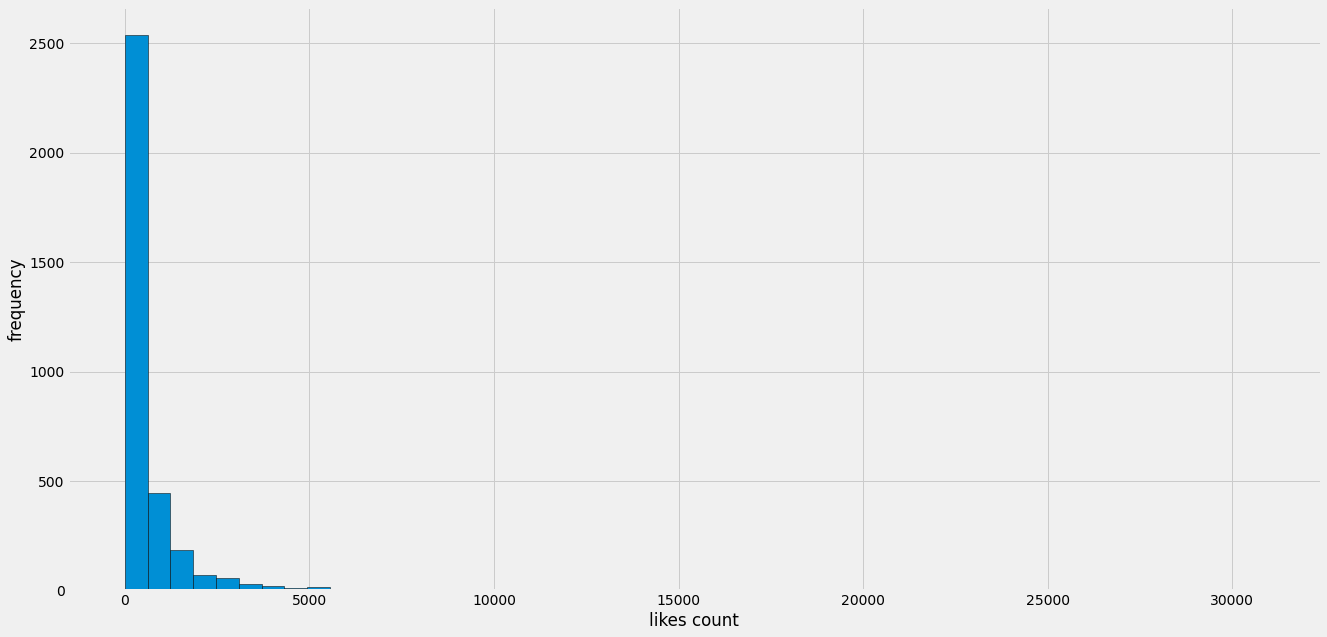

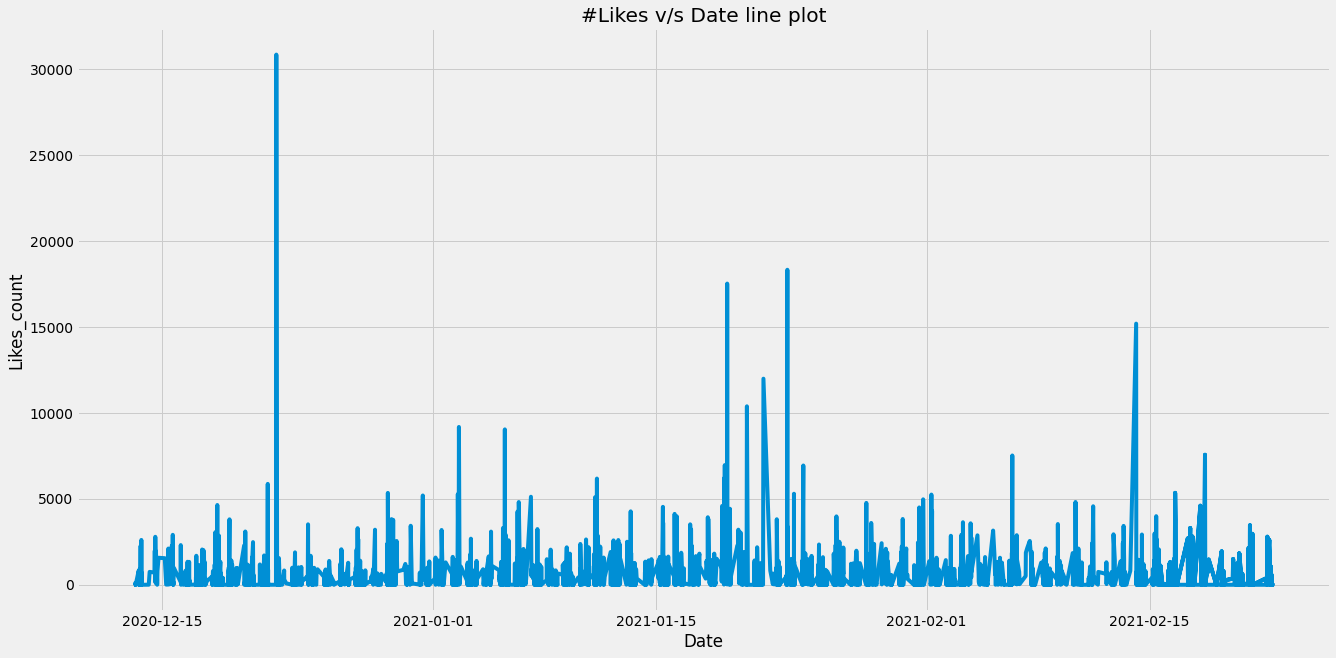

In [7]:
df['likes_counts'].plot(kind = 'hist',bins=50,figsize=(20,10),ec='black')
plt.xlabel("likes count")
plt.ylabel("frequency")
plt.show()                                              #histogram plot 

plt.figure(figsize = (20,10))
plt.plot(df['Date'],df['likes_counts'])
plt.xlabel("Date")
plt.ylabel("Likes_count")
plt.title('#Likes v/s Date line plot')
plt.show()                                              #line plot

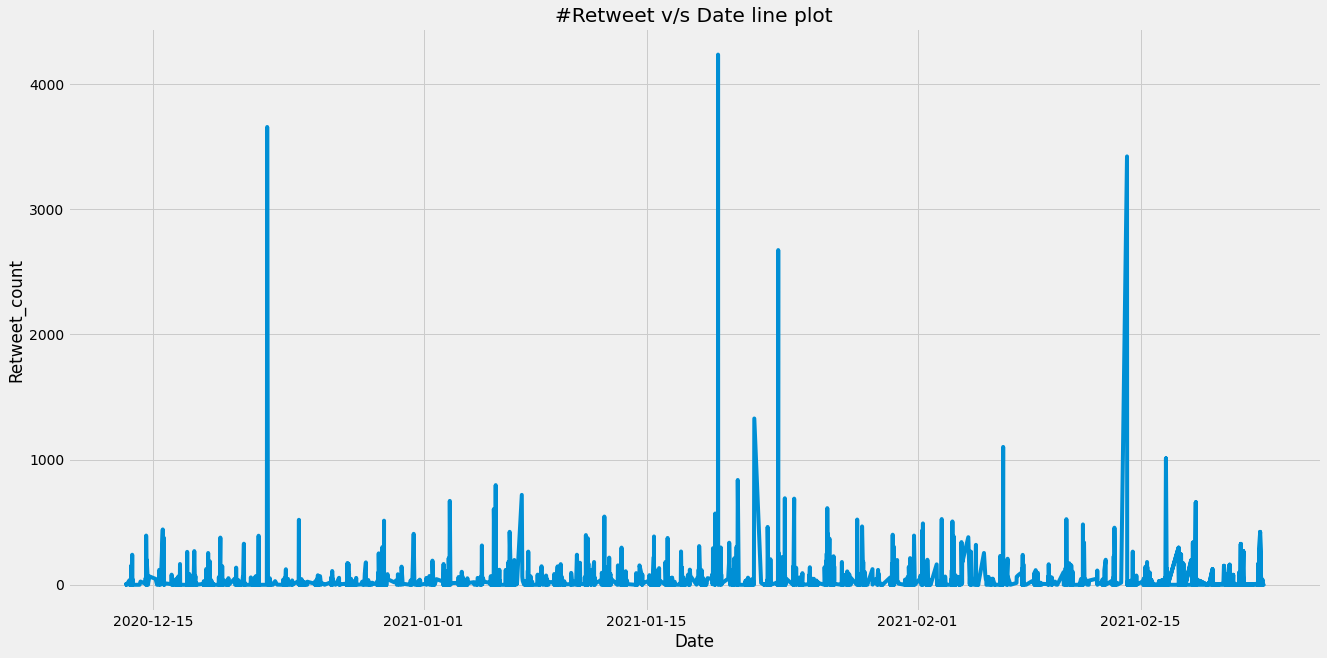

In [8]:
plt.figure(figsize = (20,10))
plt.plot(df['Date'],df['retweet_count'])
plt.xlabel("Date")
plt.ylabel("Retweet_count")
plt.title('#Retweet v/s Date line plot')
plt.show()

In [9]:
IQR1 = stats.iqr(df['likes_counts'], interpolation = 'midpoint')
IQR2 = stats.iqr(df['retweet_count'], interpolation = 'midpoint')
print("IQR of likes and retweets are",IQR1,',',IQR2)                            #to get median idea

IQR of likes and retweets are 610.0 , 20.0


In [10]:
Vader = SentimentIntensityAnalyzer()
f = lambda tweet : Vader.polarity_scores(tweet)['compound']
df['Sentiment'] = df['text'].apply(f)
df['Date'] = pd.to_datetime(df['Date']).dt.date
df.head()

,Date,text,length,id,retweet_count,likes_counts,location,language,Sentiment
0,2021-02-22,It's like the Mortal Kombat fighter selection ...,108,1363904114757758978,0,0,None,en,0.5719
1,2021-02-22,@passivefool Blue shirt guy is ITC,34,1363893760535392256,1,44,None,en,0.0000
2,2021-02-22,@Shubhrastha @Aatman_Arsenal @amritabhinder @S...,90,1363888077836406785,0,3,None,und,0.0000
3,2021-02-22,Ans: Pi/3. Pretty simple. You can figure R=2r....,140,1363885416198270978,0,55,None,en,0.4939
4,2021-02-22,@_Mjolnir_007 @learning_pt Nope,31,1363879990404608003,0,1,None,en,0.0000


Text(0.5, 0, 'Sentiment_score')

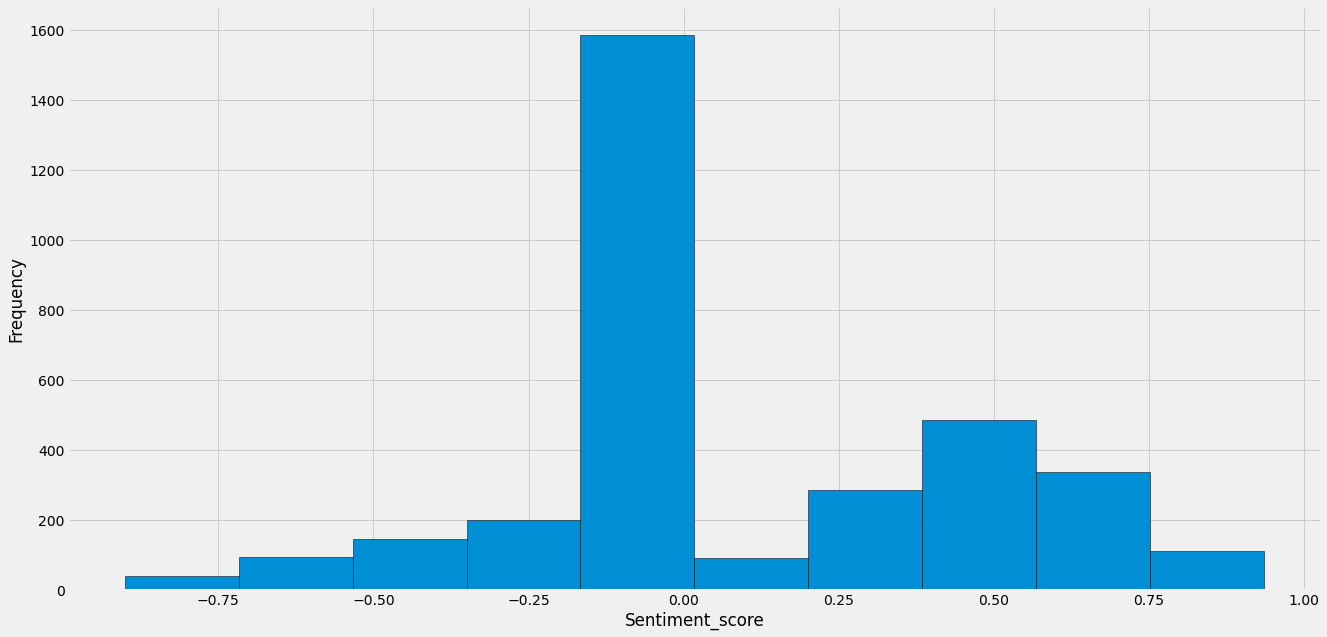

In [11]:
df['Sentiment'].plot(kind = 'hist',bins=10,figsize=(20,10),ec='black')
plt.xlabel("Sentiment_score")

In [12]:
date_df = df.groupby(['Date']).mean().reset_index()
date_df.head()

,Date,length,id,retweet_count,likes_counts,Sentiment
0,2020-12-13,50.733333,1.338103e+18,7.173333,117.693333,0.362221
1,2020-12-14,81.000000,1.338476e+18,64.000000,931.916667,0.063317
2,2020-12-15,78.166667,1.338844e+18,69.500000,764.777778,-0.072850
3,2020-12-16,79.717949,1.339185e+18,12.333333,264.076923,0.084562
4,2020-12-17,62.745098,1.339492e+18,18.803922,302.960784,0.189704


Text(0.5, 1.0, 'daily average of Sentiment analysis')

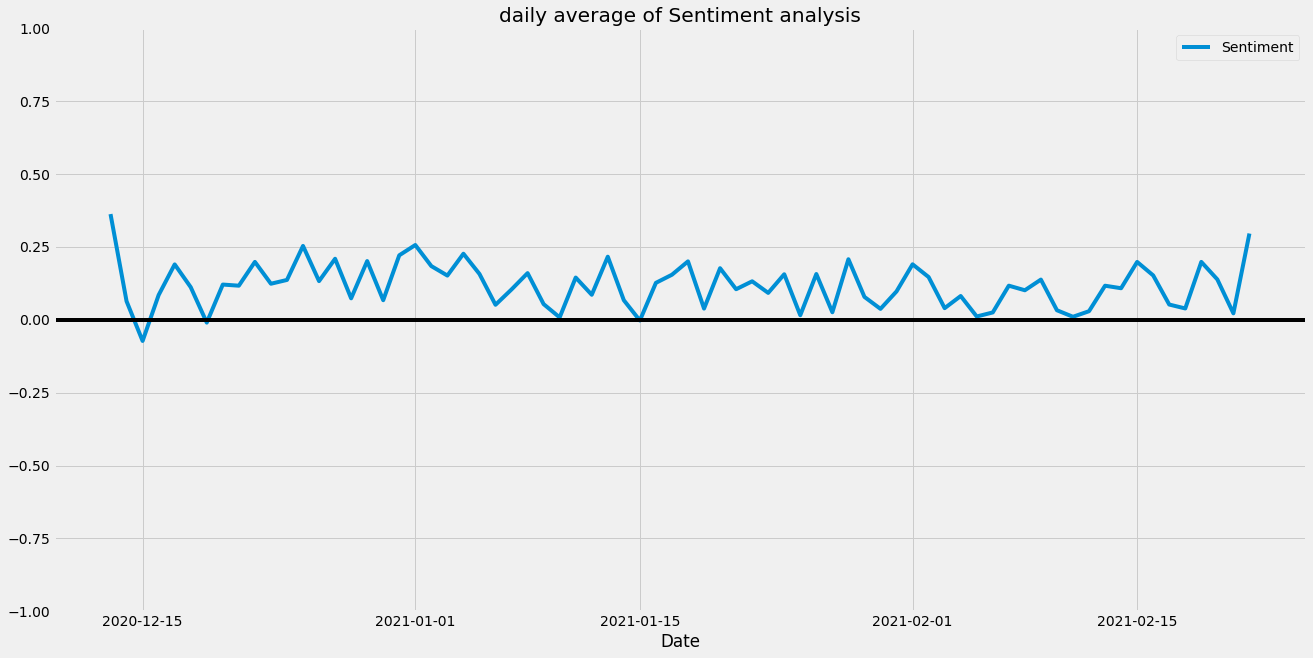

In [13]:
date_df.plot(kind='line',x='Date',y='Sentiment',figsize = (20,10),ylim=(-1,1))
plt.axhline(y=0,color = 'black')
plt.title("daily average of Sentiment analysis")

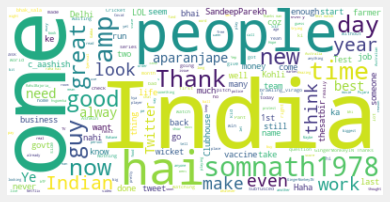

In [14]:
from wordcloud import WordCloud, STOPWORDS
text = " ".join(text for text in df.text)

stopwords = set(STOPWORDS)
stopwords.update(["HTTPS", "CO","will","t"])

wordcloud = WordCloud(stopwords = stopwords,background_color="white").generate(text)

plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()